## Deep Learning and CNN

### Extracting HOG features and Modelling

The following activities are performed as part of the HOG Features Extraction and Modelling task.

1] Loading the Preprocessed and Split Datasets

2] Extracting Histogram-of-Oriented Gradient (HOG) features

    2.1 Obtaining the LBP features from the training dataset

3] Modelling to Classify the Images

- Experiment 1: Building a model using SVM Classifier

        Exercise 1.1 SVM classifier with hyperparameters kernel='rbf', C=65.0 and extracted HOG features with parameters orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3)

        Exercise 1.2 SVM classifier with hyperparameters kernel='rbf', C=100.0 and extracted HOG features with parameters orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2)
        
- Experiment 2: Building a model using ANN Classifier

        Exercise 2.1 Keras Sequential Model with Adam optimiser

        Exercise 2.1 Keras Sequential Model with SDG Optimiser

Note: Please run/execute the Assignment1_Image_Preprocessing.ipynb notebook first to generate the dataset file math_symbol_split_datasets.npz which is utilised in this feature extraction and modelling task.

In [265]:
# Importing packages for processing
import numpy as np
import pandas as pd

# Importing packages for svm classification and and matrics for evaluation
from sklearn import svm 
from sklearn import metrics

# Importing package for LBP feature extraction from skimage library
from skimage import feature 

# Importing packages to load and display the images
import cv2

# Importing packages for ANN classification
import tensorflow as tf
from tensorflow import keras
%load_ext tensorboard

# Importing package for data disualisation and displaying confusion matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### 1] Loading the Preprocessed and Split Datasets

In [266]:
# Loading the saved datasets file
math_symbol_datasets = np.load('math_symbol_split_datasets.npz')

# Accessing the datasets
X_train = math_symbol_datasets['X_train']
X_test = math_symbol_datasets['X_test']
Y_train = math_symbol_datasets['Y_train']
Y_test = math_symbol_datasets['Y_test']

# Closing the saved file after reading and loading 
math_symbol_datasets.close()

In [267]:
# Checking the shapes of training and testing datasets
print('After loading the preprocessed datasets below are their shapes:')
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

After loading the preprocessed datasets below are their shapes:
X_train shape: (3499, 45, 45)
Y_train shape: (3499,)
X_test shape: (1500, 45, 45)
Y_test shape: (1500,)


### 2] Extracting Histogram-of-Oriented Gradient (HOG) features

#### 2.1 Obtaining the HOG features from the training dataset

In [268]:
# Extracting Histogram-of-Oriented Gradient (HOG) features with parameters orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3)
# Initialize the data matrix and labels
# print("Extracting features from training dataset...")
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features
  image = (X_train[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  H = feature.hog(image, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(3, 3), transform_sqrt=True, block_norm="L2-Hys")

  # update the data and labels
  data_train.append(H)
  labels_train.append(Y_train[img_index])


# Displaying the shape of the dataframes with LBP features extracted from train images and their labels
print("data_train:", np.shape(data_train))
print("labels_train:", np.shape(labels_train))

data_train: (3499, 729)
labels_train: (3499,)


- The data_train contains the extracted HOG features for each 3499 image of the training dataset and with its HOG features encoded across 729 dimensions.

- The labels_train contains the corresponding labels for each image in the dataset, indicating the class or category to which each image belongs.

Together, the data_train and labels_train constitute the training dataset used to train a model, such as a classifier, to recognize and classify images based on their extracted features.

### 3] Modelling to Classify the Images

### Experiment 1: Building a model using SVM Classifier 

#### Exercise 1.1 (SVM classifier with hyperparameters kernel='rbf', C=65.0) and extracted HOG features with parameters orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3)

In [269]:
# Generating a 'svm_model1' instance of SVM classifire with its hyperparameters
svm_model1 = svm.SVC(kernel='rbf', C=65.0, random_state=19)

# Training the SVM classifier model using the HOG features of the training dataset
svm_model1.fit(data_train, labels_train)

SVC(C=65.0, random_state=19)

In [270]:
# Checking the accuray on the training dataset
print("Training dataset Accuracy: {:.4f}".format(svm_model1.score(data_train, labels_train)))

Training dataset Accuracy: 1.0000


#### Obtaining the HOG features from the testing dataset

In [271]:
# initialize the data matrix and labels
# print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]
# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  img=X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(3, 3), transform_sqrt=True, block_norm="L2-Hys")
  pred = svm_model1.predict(H.reshape(1, -1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)

  labels_test.append(Y_test[img_ind])


#### Evaluating model with the testing dataset

In [272]:
# Checking the accuracy on the testing dataset
accuracy = metrics.accuracy_score(Y_test, predict_test)
print("Testing dataset Accuracy: {:.4f}".format(accuracy))

Testing dataset Accuracy: 0.9927


- An accuracy of 100% on the training dataset suggests that the SVM model has learned to classify the training samples perfectly. And the accuracy of 99.27% on the testing dataset indicates that the SVM model performs exceptionally well on unseen data.

- The high testing accuracy suggests that the model has effectively learned the underlying patterns of the images data and can generalize well to make accurate predictions on new and unseen samples.

- The close proximity of the testing accuracy to the training accuracy indicates that the model has not overfit to the training data and can generalize effectively to new samples.

[[152   0   0   0   0   0   0   0   0   0]
 [  0 157   0   0   0   0   0   0   0   0]
 [  0   0 151   5   0   0   0   0   0   0]
 [  0   0   0 154   0   0   0   0   0   0]
 [  0   0   0   0 136   0   0   0   0   1]
 [  0   0   0   0   1 156   1   0   0   0]
 [  0   0   0   0   0   0 128   0   0   0]
 [  0   0   0   0   0   0   0 159   0   0]
 [  0   0   0   0   0   0   0   0 144   1]
 [  2   0   0   0   0   0   0   0   0 152]]


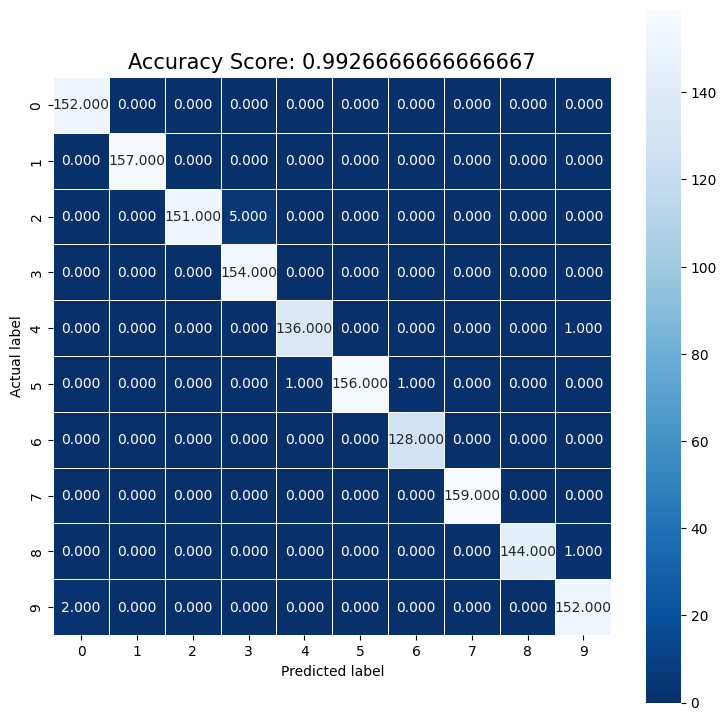

In [273]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(Y_test, predict_test)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

- The above confusion matrix illustrates a comparison between the model's predicted outcomes and the true labels across various categories.

- The class 2 corresponding "minus" symbol is misclassified as class 3 (sqrt) in 5 instances, which could result from similarities in graphical representations, particularly when the minus symbol appears as a horizontal or elongated shape similar to the square root symbol.

- Also the class 9 representing "squared_bracket" symbol is misclassified as class 0 (pm) in 2 instances, In certain fonts or styles, the "pm" symbol's appearance might resemble parts of squared brackets, leading to misclassification.

- Additionally, there are few instances of misclassifications, further highlighting the effectiveness of the model in distinguishing between different classes. Therefore, overall, the model demonstrated strong performance in classifying the data.

In [274]:
# Creating the list with unique label names representing the math symbols
labelNames = ["pm", "leq", "minus", "sqrt", "sum", "theta", "alpha", "tan", "closed_bracket", "squared_bracket"]

In [275]:
images = []
orig_labels=[]

# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(Y_test)), size=(16,)):
  # classify the clothing
  test_img = (X_test[i])
  H1 = feature.hog(test_img, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(3, 3), transform_sqrt=True, block_norm="L2-Hys")
  pred = svm_model1.predict(H1.reshape(1, -1))[0]
  
  #prediction = model.predict(test_img.reshape(1, -1))
  label = labelNames[pred]
  orig_labels.append(labelNames[Y_test[i]])
  color = (0, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(test_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


alpha
minus
leq
sum


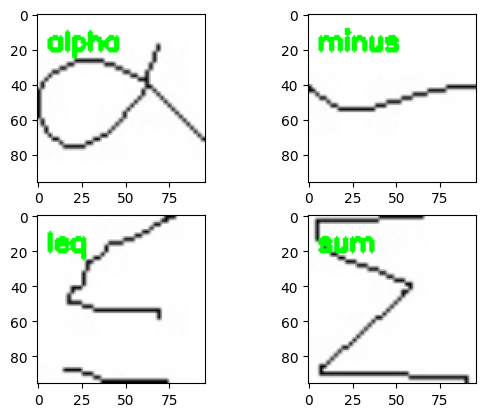

In [276]:
## Display the classification results
#Plot the image and the predicted labels
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])
print(orig_labels[4])

#### Exercise 1.2 (SVM classifier with hyperparameters kernel='rbf', C=100.0) and extracted HOG features with parameters orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2)

In [277]:
# Extracting Histogram-of-Oriented Gradient (HOG) features with parameters orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2)
# Initialize the data matrix and labels
# print("Extracting features from training dataset...")
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features
  image = (X_train[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")

  # update the data and labels
  data_train.append(H)
  labels_train.append(Y_train[img_index])

print("data_train:", np.shape(data_train))
print("labels_train:", np.shape(labels_train))

data_train: (3499, 324)
labels_train: (3499,)


In [278]:
# Generating a 'svm_model2' instance of SVM classifire with its hyperparameters
svm_model2 = svm.SVC(kernel='rbf', C=100.0, random_state=19)

# Training the SVM classifier model using the HOG features of the training dataset
svm_model2.fit(data_train, labels_train)

SVC(C=100.0, random_state=19)

In [279]:
# Checking the accuracy on the training dataset
print("Training dataset Accuracy: {:.4f}".format(svm_model2.score(data_train, labels_train)))

Training dataset Accuracy: 1.0000


#### Obtaining the HOG features from the testing dataset

In [280]:
# initialize the data matrix and labels
#print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]
# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  img=X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = svm_model2.predict(H.reshape(1, -1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)

  labels_test.append(Y_test[img_ind])

#### Evaluating model with the testing dataset

In [281]:
# Checking the accuray on the training dataset
accuracy = metrics.accuracy_score(Y_test, predict_test)
print("Testing dataset Accuracy: {:.4f}".format(accuracy))

Testing dataset Accuracy: 0.9947


- The model achieved perfect accuracy on the training dataset, indicating that the 2nd SVM model was able to effectively separate the classes in the feature space, resulting in no misclassifications during training.

- The model also demonstrated exceptional performance on unseen data, achieving a high accuracy score of 99.47% on the testing dataset. This suggests that the model generalized well to new, unseen samples, accurately classifying them based on the learned patterns from the training data.

- Overall, the high accuracy scores on both the training and testing datasets indicate that the 2nd SVM model trained on HOG features is highly effective in classifying the math symbols. The near-perfect accuracy on the testing dataset suggests that the model is robust and reliable, making it suitable for practical applications in math symbol classification.

[[152   0   0   0   0   0   0   0   0   0]
 [  0 155   0   0   0   0   2   0   0   0]
 [  0   0 153   3   0   0   0   0   0   0]
 [  0   0   0 154   0   0   0   0   0   0]
 [  0   0   0   0 136   0   0   0   0   1]
 [  0   0   0   0   0 157   1   0   0   0]
 [  0   0   0   0   0   1 127   0   0   0]
 [  0   0   0   0   0   0   0 159   0   0]
 [  0   0   0   0   0   0   0   0 145   0]
 [  0   0   0   0   0   0   0   0   0 154]]


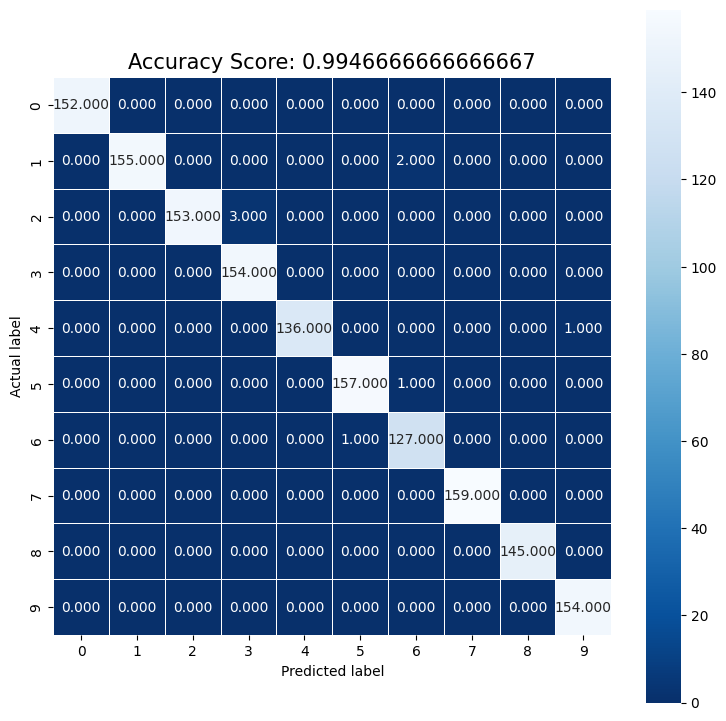

In [282]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(Y_test, predict_test)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

- The above confusion matrix illustrates the SVM model's predictions compared to the actual labels for the testing dataset.

- The class 2 describing "minus", is misclassified as class 3 (sqrt) in 3 instances, as the horizontal line in the "minus" symbol is written with a slight curvature or if the radical sign in the "sqrt" symbol is simplified, they may appear more alike. These similarities might become more pronounced, leading to potential misclassifications.

- The class 1 describing "leq" symbol, is misclassified as class 6 (alpha) in 2 instances. This misclassification could be due to similarities in the visual representations of "leq" and "alpha" symbols, especially in handwritten or stylized fonts where distinguishing features may not be clear.

- Furthermore, the class 6 representing "alpha" symbol, is misclassified as class 5 (theta) in 1 instance, which may result from visual similarities between the "alpha" and "theta" symbols, particularly in certain orientations or styles.

- In contrast, no misclassifications were observed and the model accurately classified all instances of the class 0 (pm), class 3 (sqrt), class 7 (tan), class 8 (closed_bracket) and class 9 (squared_bracket).

- Thus, the model performed exceptionally well in the classification task, as evidenced by the confusion matrix. The majority of the predictions align with the actual labels, with high values along the diagonal indicating accurate classifications, emphasizing the model's capability to differentiate between various classes.


In [283]:
images = []
orig_labels=[]

# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(Y_test)), size=(16,)):
  # classify the clothing
  test_img = (X_test[i])
  H1 = feature.hog(test_img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = svm_model2.predict(H1.reshape(1, -1))[0]
  
  #prediction = model.predict(test_img.reshape(1, -1))
  label = labelNames[pred]
  orig_labels.append(labelNames[Y_test[i]])
  color = (0, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(test_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


minus
leq
leq
sqrt


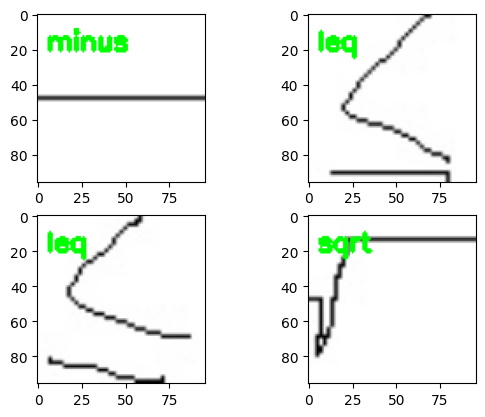

In [284]:
## Display the classification results
#Plot the image and the predicted labels
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])
print(orig_labels[4])

### Experiment 2: Building a model using ANN Classifier

#### Exercise 2.1 (Keras Sequential Model with Adam optimiser)

In [285]:
# Set random seed for TensorFlow
tf.random.set_seed(19)

# Set random seed for NumPy (optional)
np.random.seed(19)

#### Designing a model framework

In [286]:
# Creating a ANN Sequential model with three Dense layers
ann_model1 = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(324,)),
                                         tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                         tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#### Visualising the model

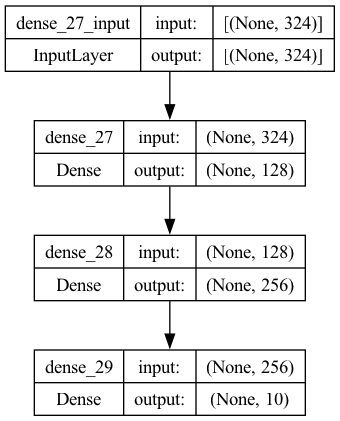

In [287]:
#Visualize Network Model
modelViz_file= 'ANN_Model1_HOG_Features.png' # Model filename

# Plot model
keras.utils.plot_model(ann_model1, to_file=modelViz_file, show_shapes=True)

In [288]:
# Displaying the summary of the model 
ann_model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               41600     
                                                                 
 dense_28 (Dense)            (None, 256)               33024     
                                                                 
 dense_29 (Dense)            (None, 10)                2570      
                                                                 
Total params: 77,194
Trainable params: 77,194
Non-trainable params: 0
_________________________________________________________________


In [289]:
# Compiling the ANN model with Adam optimizer, sparse categorical cross-entropy loss function, and accuracy metric
ann_model1.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the compiled ANN model on the training data for 10 epochs
H=ann_model1.fit(np.array(data_train), np.array(labels_train), epochs=10)

Epoch 1/10
110/110 [==============================] - 1s 2ms/step - loss: 0.7421 - accuracy: 0.8425
Epoch 2/10
110/110 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 0.9777
Epoch 3/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0561 - accuracy: 0.9851
Epoch 4/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9906
Epoch 5/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9940
Epoch 6/10
110/110 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9940
Epoch 7/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9963
Epoch 8/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9980
Epoch 9/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9986
Epoch 10/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9989

In [290]:
# Displaying the keys helps to understand the structure of the training history and the available metrics
type(H)
print(H.history.keys())

dict_keys(['loss', 'accuracy'])


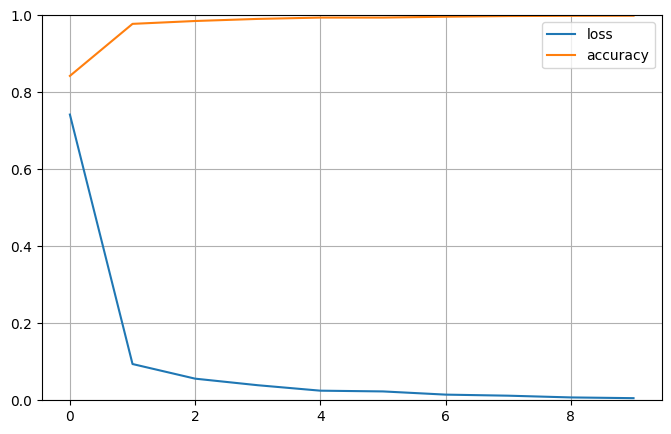

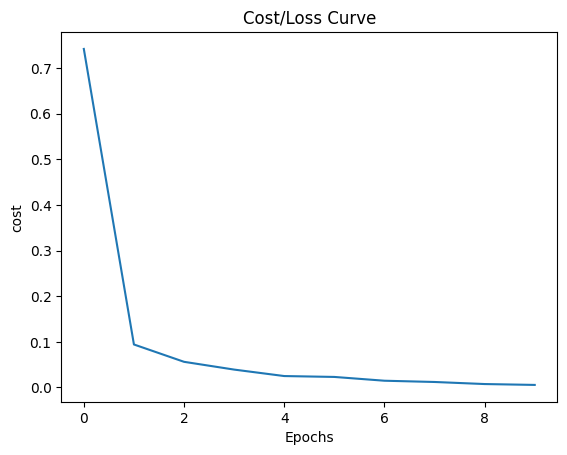

In [291]:
# Plot the learning curves
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Plot only the loss train loss
plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

#### Extracting HOG features for the Testing dataset

In [292]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predictions = []
predict_test = []
labels_test = []
data_test=[]
# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  img=X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = ann_model1.predict(H.reshape(1, -1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)

  # Get the index of the class with the highest probability
  predicted_label_index = np.argmax(pred)
  
  # Store the classfication result
  predictions.append(predicted_label_index)
  labels_test.append(Y_test[img_ind])


Extracting features from test dataset...
1/1 [==============================] - 0s 22ms/step


In [293]:
# Evaluating the model's performance on test dataset
ann_model1.evaluate(np.array(data_test), np.array(labels_test))

47/47 [==============================] - 0s 1ms/step - loss: 0.0363 - accuracy: 0.9913


[0.03633580356836319, 0.9913333058357239]

In [294]:
# Checking the model's performance on test dataset
ann_model1_accuracy=metrics.accuracy_score(labels_test, predictions)
print("Testing dataset Accuracy: {:.4f}".format(ann_model1_accuracy))

Testing dataset Accuracy: 0.9913


- The ANN model achieved nearly perfect accuracy of 99.89% on the training dataset, indicating that it effectively learned the underlying patterns and relationships present in the HOG features extracted from the training images.

- The testing dataset accuracy of 99.13% suggests that the model generalizes well to new, unseen data, which is crucial for its real-world applicability. 

- The high testing accuracy demonstrates that the model can effectively classify math symbols based on their HOG features, even when presented with images it has not seen during training. This suggests that the model has learned meaningful representations from the input features and can generalize its knowledge to classify similar symbols accurately.

[[152   0   0   0   0   0   0   0   0   0]
 [  0 157   0   0   0   0   0   0   0   0]
 [  1   0 151   4   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   0   0   1]
 [  0   2   0   0 134   0   0   0   0   1]
 [  0   1   0   0   2 155   0   0   0   0]
 [  0   0   0   0   0   1 127   0   0   0]
 [  0   0   0   0   0   0   0 159   0   0]
 [  0   0   0   0   0   0   0   0 145   0]
 [  0   0   0   0   0   0   0   0   0 154]]


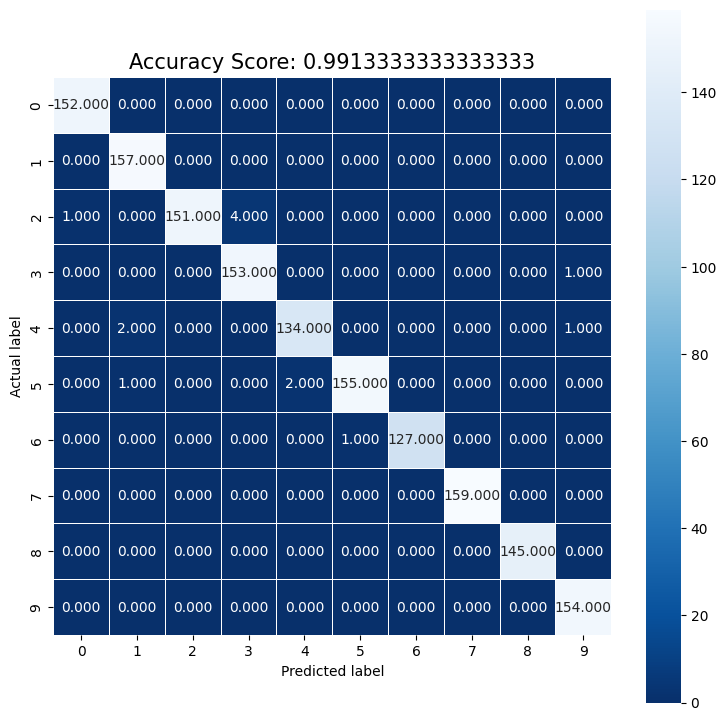

In [295]:
# Plot the confusion matrix
cm  = metrics.confusion_matrix(Y_test, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(ann_model1_accuracy)
plt.title(all_sample_title, size = 15);

- The above confision matrix provides insights for the misclassifications observed in the classification of the math symbols.

- The class 5 representing "theta" symbol, is misclassified as class 4 (sum) in 2 instances, class 1 (leq) in 1 instance. This misclassifications as "sum" might occur due to similarities in visual features, such as circular shapes or certain orientations, which can be present in both "theta" and "sum" symbols.

- The class 4 corresponding to "sum" symbol, is misclassified as class 1 (leq) in 2 instances, class 9 (squared_bracket) in 1 instance. This misidentifications as "leq" may arise from resemblances in visual characteristics, such as shared horizontal lines or comparable shapes. Additionally, misclassifications as "squared_bracket" could occur when the summation symbol's graphical representation resembles the squared bracket symbol.

- Furthermore, class 2 representing  "minus" symbol, is misclassified as class 3 (sqrt) in 4 instances and class 0 (pm) in 1 instance. This misclassifications as "sqrt" and "pm" might occur due to similarities in visual features, such as horizontal lines, which can be present in both all these three symbols.

- Also, there is 1 instance of each misclassification of class 3 (sqrt) as class 9 (squared_bracket) and class 6 (alpha) as class 5 (theta). These misclassifications might occur due to similarities in visual features, such as circular shapes and vertical line, especially in cerrtain handwritten symbols where distinguishing features may not be clear.

- Overall, model showss strong performance, as evidenced by the above confusion matrix where no misidentifications is observed for class 0 (pm), class 1 (leq), class 7 (tan), class 8 (closed_bracket), and class 9 (squared_bracket). Additionally, the majority of predictions aligned closely with the actual labels, resulting in high values along the diagonal, indicating accurate classifications. 

#### Exercise 2.1 (Keras Sequential Model with SDG Optimiser)

In [296]:
# Creating a 2nd ANN Sequential model with three Dense layers
ann_model2 = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(324,)),
                                         tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                         tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

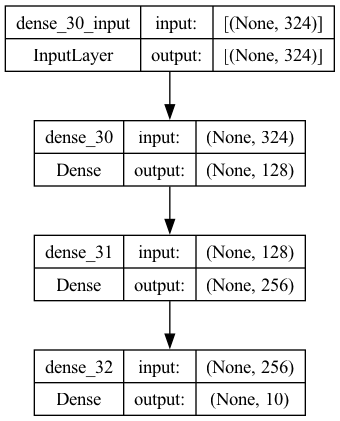

In [297]:
#Visualize Network Model
modelViz_file= 'ANN_Model2_HOG_Features.png' # Model filename

# Plot model
keras.utils.plot_model(ann_model2, to_file=modelViz_file, show_shapes=True)

In [298]:
# Displaying the summary of the model
ann_model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               41600     
                                                                 
 dense_31 (Dense)            (None, 256)               33024     
                                                                 
 dense_32 (Dense)            (None, 10)                2570      
                                                                 
Total params: 77,194
Trainable params: 77,194
Non-trainable params: 0
_________________________________________________________________


In [299]:
# Compiling the 2nd ANN model with SDG optimizer, sparse categorical cross-entropy loss function, and accuracy metric
ann_model2.compile(optimizer = tf.optimizers.SGD(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) ## add the required arguments

# Training the compiled ANN model on the training data for 10 epochs
H=ann_model2.fit(np.array(data_train), np.array(labels_train), epochs=10)

Epoch 1/10
110/110 [==============================] - 1s 1ms/step - loss: 2.2605 - accuracy: 0.1966
Epoch 2/10
110/110 [==============================] - 0s 1ms/step - loss: 2.1016 - accuracy: 0.5785
Epoch 3/10
110/110 [==============================] - 0s 1ms/step - loss: 1.8946 - accuracy: 0.7757
Epoch 4/10
110/110 [==============================] - 0s 1ms/step - loss: 1.6187 - accuracy: 0.8554
Epoch 5/10
110/110 [==============================] - 0s 1ms/step - loss: 1.3015 - accuracy: 0.8923
Epoch 6/10
110/110 [==============================] - 0s 1ms/step - loss: 1.0037 - accuracy: 0.9103
Epoch 7/10
110/110 [==============================] - 0s 1ms/step - loss: 0.7687 - accuracy: 0.9288
Epoch 8/10
110/110 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.9331
Epoch 9/10
110/110 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.9408
Epoch 10/10
110/110 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.9423

In [300]:
# Displaying the keys to helps understand the structure of the training history and the available metrics
type(H)
print(H.history.keys())

dict_keys(['loss', 'accuracy'])


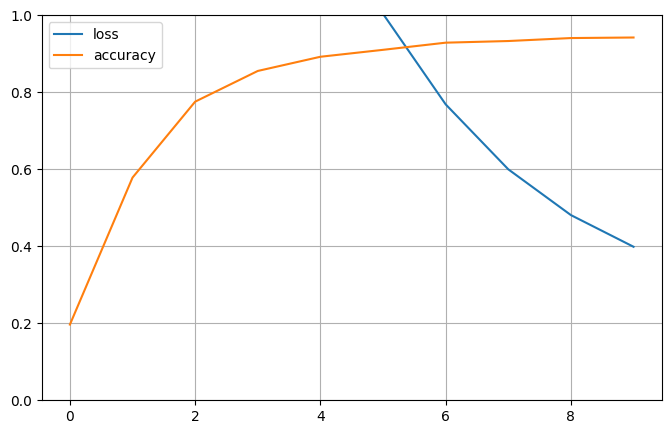

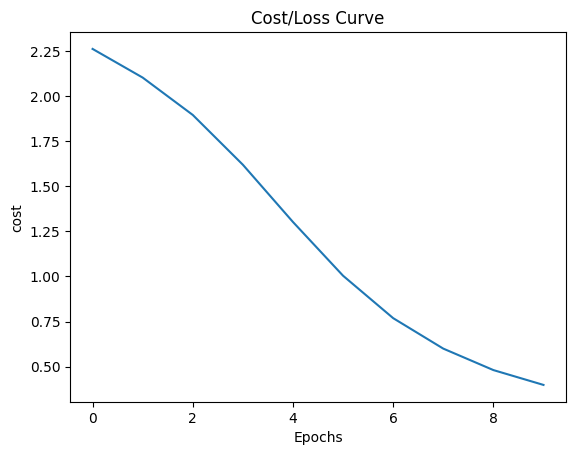

In [301]:
# Plot the learning curves
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Plot only the loss train loss
plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

#### Extracting HOG features for the Testing dataset

In [302]:
# initialize the data matrix and labels
# print("Extracting features from test dataset...")
predictions = []
predict_test = []
labels_test = []
data_test=[]

# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  img=X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = ann_model2.predict(H.reshape(1, -1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)

  # Get the index of the class with the highest probability
  predicted_label_index = np.argmax(pred)
  
  # Store the classfication result
  predictions.append(predicted_label_index)
  labels_test.append(Y_test[img_ind])


1/1 [==============================] - 0s 22ms/step


In [303]:
# Evaluating the model's performance on test dataset
ann_model2.evaluate(np.array(data_test), np.array(labels_test))

47/47 [==============================] - 0s 1ms/step - loss: 0.3770 - accuracy: 0.9433


[0.37695252895355225, 0.9433333277702332]

In [304]:
# Checking the model's performance on test dataset
ann_model2_accuracy=metrics.accuracy_score(labels_test, predictions)
print("Testing dataset Accuracy: {:.4f}".format(ann_model2_accuracy))

Testing dataset Accuracy: 0.9433


- With a training dataset accuracy of 94.23% and a testing dataset accuracy of 94.33%, the model demonstrates strong generalization ability, meaning it can effectively classify unseen data. 

- Additionally, the accuracy score of this 2nd ANN model is relatively less in comparison to the 1st ANN model, further supporting its robustness and reliability in classifying new samples. Overall, the 1st ANN model results suggest that the ANN model trained on HOG features with Admam optimiser is a promising approach for the classification task.

[[134   0   0   8   2   0   6   0   0   2]
 [  0 147   0   0   0   3   4   2   0   1]
 [  0   0 151   3   0   0   1   1   0   0]
 [  3   0   1 142   0   0   0   0   0   8]
 [  2   2   0   2 124   3   1   1   1   1]
 [  1   3   0   0   1 149   4   0   0   0]
 [  0   4   0   1   0   3 116   4   0   0]
 [  0   2   0   0   0   0   0 157   0   0]
 [  0   0   0   0   0   0   2   0 143   0]
 [  0   0   0   2   0   0   0   0   0 152]]


Text(0.5, 1.0, 'Accuracy Score: 0.9433333333333334')

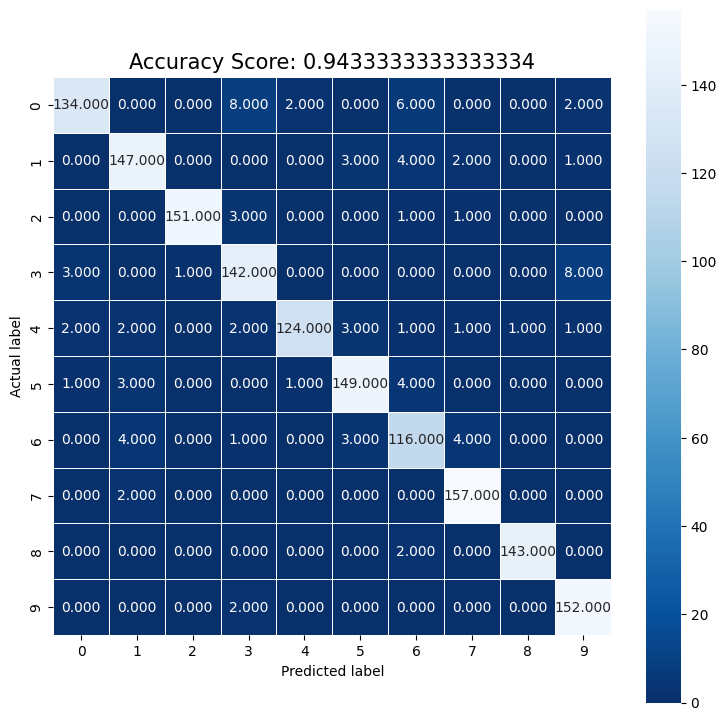

In [305]:
# Plot the confusion matrix
cm  = metrics.confusion_matrix(Y_test, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(ann_model2_accuracy)
plt.title(all_sample_title, size = 15)

- The class 0 represesting "pm" symbol, is misclassified as class 3 (sqrt) in 8 instances, class 6 (alpha) in 6 instances and class 4 (sum) and  class 9 (squared_bracket) each in 2 instances. This misclassification could occur due to shared visual elements particularly in certain handwritten styles where distinguishing features may not be clear.

- Moreover, there are misclassifications across different classes highlight challenges in accurately distinguishing between symbols due to shared visual features or ambiguities in their representations. Also, these misclassifications even less but are seen across all the classes with this 2nd ANN model in constrast to 1st ANN model.